In [135]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

In [137]:
ROOT = Path.cwd()
DATA_DIR = ROOT / "csv_files"
OUTPUT_DIR = ROOT / "outputs"

DATA_DIR.mkdir(exist_ok=True)
OUTPUT_DIR.mkdir(exist_ok=True)

print("Data dir:", DATA_DIR)
print("Output dir:", OUTPUT_DIR)

Data dir: D:\Scholar\Pro Max\Projects\ds_bhaskar\csv_files
Output dir: D:\Scholar\Pro Max\Projects\ds_bhaskar\outputs


In [138]:
trades = pd.read_csv(DATA_DIR / "historical_data.csv")
sentiment = pd.read_csv(DATA_DIR / "fear_greed_index.csv")

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


In [139]:
trades = trades.rename(columns={
    "Account": "account",
    "Coin": "symbol",
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Timestamp IST": "timestamp_ist",
    "Closed PnL": "closed_pnl",
    "Fee": "fee",
    "Timestamp": "timestamp"
})

In [140]:
trades.info()
trades.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   symbol            211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,account,symbol,execution_price,size_tokens,size_usd,side,timestamp_ist,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,fee,Trade ID,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [141]:
trades["timestamp"] = pd.to_datetime(trades["timestamp"], unit="ms", errors="coerce")
trades["trade_date"] = trades["timestamp"].dt.date

In [142]:
trades.info()
trades.head()
trades["closed_pnl"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   symbol            211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   closed_pnl        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  Trad

count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: closed_pnl, dtype: float64

In [143]:
sentiment = sentiment.rename(columns={
    "classification": "sentiment",
    "value": "sentiment_value"
})

In [144]:
sentiment.info()
sentiment.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        2644 non-null   int64 
 1   sentiment_value  2644 non-null   int64 
 2   sentiment        2644 non-null   object
 3   date             2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,timestamp,sentiment_value,sentiment,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [145]:
sentiment["date"] = pd.to_datetime(sentiment["date"], errors="coerce")
sentiment["trade_date"] = sentiment["date"].dt.date

In [146]:
sentiment["sentiment"] = (
    sentiment["sentiment"]
    .astype(str)
    .str.strip()
    .str.lower()
)

sentiment["sentiment"] = sentiment["sentiment"].replace({
    "extreme fear": "extreme_fear",
    "extreme greed": "extreme_greed"
})

In [147]:
sentiment["sentiment_binary"] = sentiment["sentiment"].map({
    "fear": 0,
    "extreme_fear": 0,
    "neutral": np.nan,
    "greed": 1,
    "extreme_greed": 1
})

In [148]:
sentiment["sentiment_ordinal"] = sentiment["sentiment"].map({
    "extreme_fear": -2,
    "fear": -1,
    "neutral": 0,
    "greed": 1,
    "extreme_greed": 2
})

In [149]:
sentiment["sentiment"].value_counts(dropna=False)
sentiment["sentiment_binary"].value_counts(dropna=False)
sentiment["sentiment_ordinal"].value_counts(dropna=False)

sentiment_ordinal
-1    781
 1    633
-2    508
 0    396
 2    326
Name: count, dtype: int64

In [150]:
sentiment_merge = (
    sentiment[["trade_date", "sentiment", "sentiment_binary", "sentiment_ordinal"]]
    .drop_duplicates("trade_date")
)

In [151]:
trades_sentiment = trades.merge(
    sentiment_merge,
    on="trade_date",
    how="left"
)

In [152]:
trades_sentiment[["sentiment", "sentiment_binary"]].isna().mean()

sentiment           0.127642
sentiment_binary    0.161449
dtype: float64

In [153]:
trades_sentiment.to_csv(
    DATA_DIR / "trades_with_sentiment.csv",
    index=False
)

In [154]:
df = trades_sentiment.copy()

In [155]:
df["pnl"] = df["closed_pnl"]
df["net_pnl"] = df["closed_pnl"] - df["fee"]
df["return_usd"] = df["net_pnl"] / df["size_usd"]

In [156]:
df["side"] = df["side"].str.lower()

df["direction"] = df["side"].map({
    "buy": 1,
    "sell": -1
})

In [157]:
df["abs_size_usd"] = df["size_usd"].abs()
df["fee_ratio"] = df["fee"] / df["abs_size_usd"]

In [158]:
df["sentiment_direction_interaction"] = (
    df["direction"] * df["sentiment_ordinal"]
)

In [159]:
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek  # 0 = Monday

In [160]:
df["is_profitable"] = (df["net_pnl"] > 0).astype(int)

In [161]:
df[[
    "pnl",
    "net_pnl",
    "return_usd",
    "fee_ratio",
    "abs_size_usd"
]].describe()

,pnl,net_pnl,return_usd,fee_ratio,abs_size_usd
count,211224.000000,211224.000000,211181.000000,211181.000000,2.112240e+05
mean,48.749001,47.585034,0.018646,0.000349,5.639451e+03
std,919.164828,918.621638,0.845870,0.009504,3.657514e+04
min,-117990.104100,-118071.556516,-384.406762,-0.000020,0.000000e+00
25%,0.000000,-0.194153,-0.000300,0.000096,1.937900e+02
50%,0.000000,-0.005857,-0.000048,0.000250,5.970450e+02
75%,5.792797,5.535112,0.010109,0.000350,2.058960e+03
max,135329.090100,135299.803088,3.403500,1.432547,3.921431e+06


In [162]:
feature_path = DATA_DIR / "trades_features.csv"
df.to_csv(feature_path, index=False)

print(f"Saved feature dataset to {feature_path}")

Saved feature dataset to D:\Scholar\Pro Max\Projects\ds_bhaskar\csv_files\trades_features.csv


In [163]:
df.shape

(211224, 30)

In [164]:
df[[
    "sentiment",
    "sentiment_binary",
    "sentiment_ordinal",
    "net_pnl",
    "return_usd",
    "abs_size_usd",
    "fee_ratio"
]].isna().mean()

sentiment            0.127642
sentiment_binary     0.161449
sentiment_ordinal    0.127642
net_pnl              0.000000
return_usd           0.000204
abs_size_usd         0.000000
fee_ratio            0.000204
dtype: float64

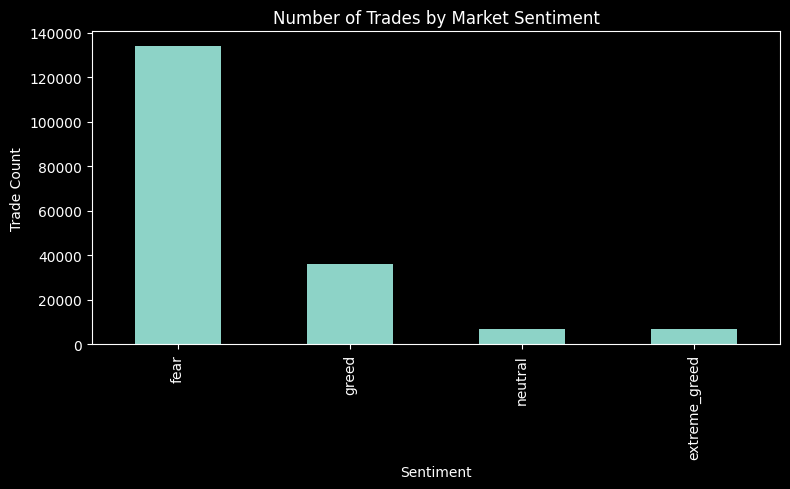

In [165]:
#Do traders trade more during Greed or Fear?

trade_count = (
    df.groupby("sentiment")["account"]
    .count()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
trade_count.plot(kind="bar")
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Trade Count")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "trade_count_by_sentiment.png")
plt.show()

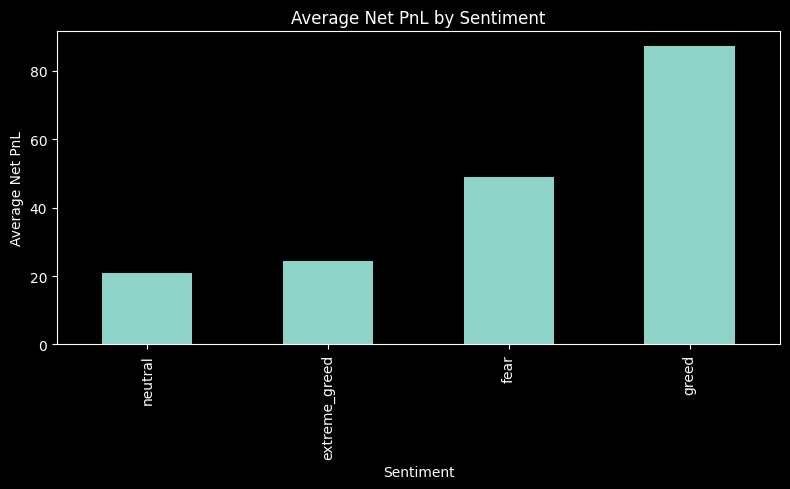

In [166]:
#Are traders more profitable during Fear or Greed?
pnl_by_sentiment = (
    df.groupby("sentiment")["net_pnl"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
pnl_by_sentiment.plot(kind="bar")
plt.title("Average Net PnL by Sentiment")
plt.ylabel("Average Net PnL")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "avg_pnl_by_sentiment.png")
plt.show()

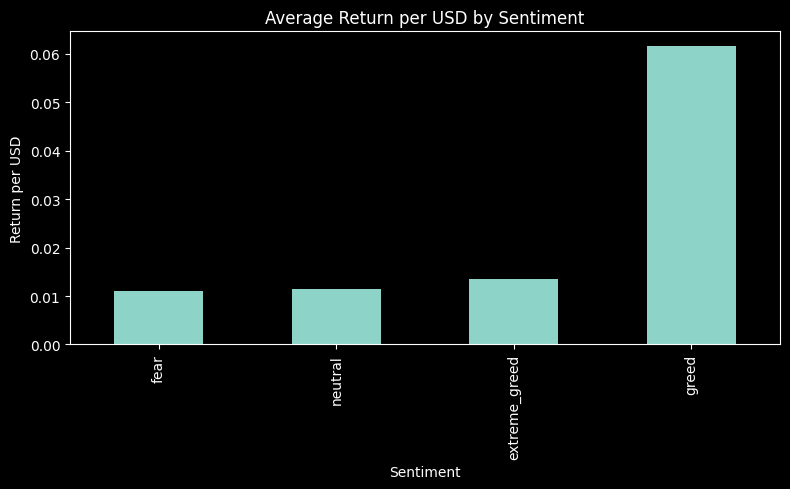

In [167]:
#Do Fear trades have better efficiency per dollar?
ret_by_sentiment = (
    df.groupby("sentiment")["return_usd"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
ret_by_sentiment.plot(kind="bar")
plt.title("Average Return per USD by Sentiment")
plt.ylabel("Return per USD")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "return_by_sentiment.png")
plt.show()

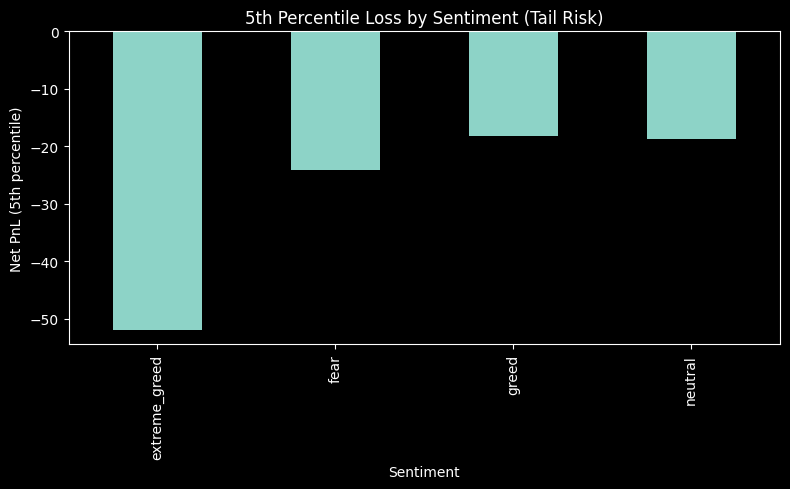

In [168]:
#Are losses worse during Greed?
loss_df = df[df["net_pnl"] < 0]

loss_tail = (
    loss_df.groupby("sentiment")["net_pnl"]
    .quantile(0.05)
)

plt.figure(figsize=(8,5))
loss_tail.plot(kind="bar")
plt.title("5th Percentile Loss by Sentiment (Tail Risk)")
plt.ylabel("Net PnL (5th percentile)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "tail_loss_by_sentiment.png")
plt.show()

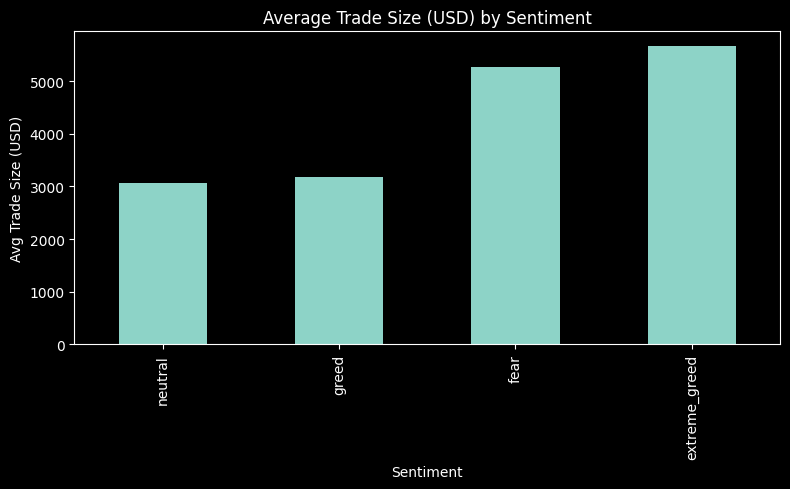

In [169]:
#Do traders take larger positions during Greed?
exposure_by_sentiment = (
    df.groupby("sentiment")["abs_size_usd"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
exposure_by_sentiment.plot(kind="bar")
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("Avg Trade Size (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "exposure_by_sentiment.png")
plt.show()

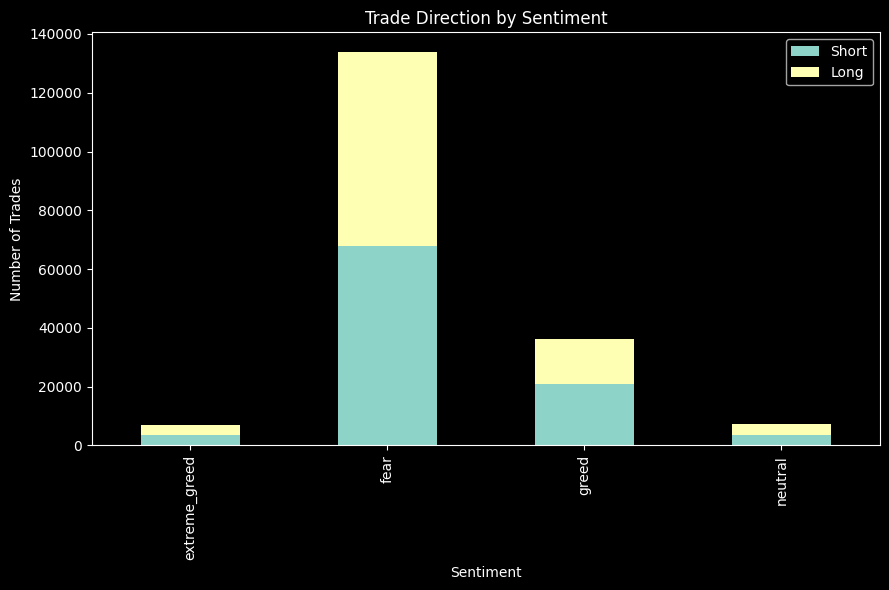

In [170]:
#Do traders chase trends or trade contrarian?
direction_sentiment = (
    df.groupby(["sentiment", "direction"])
    .size()
    .unstack()
)

direction_sentiment.plot(
    kind="bar",
    stacked=True,
    figsize=(9,6)
)

plt.title("Trade Direction by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.legend(["Short", "Long"])
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "direction_bias_by_sentiment.png")
plt.show()

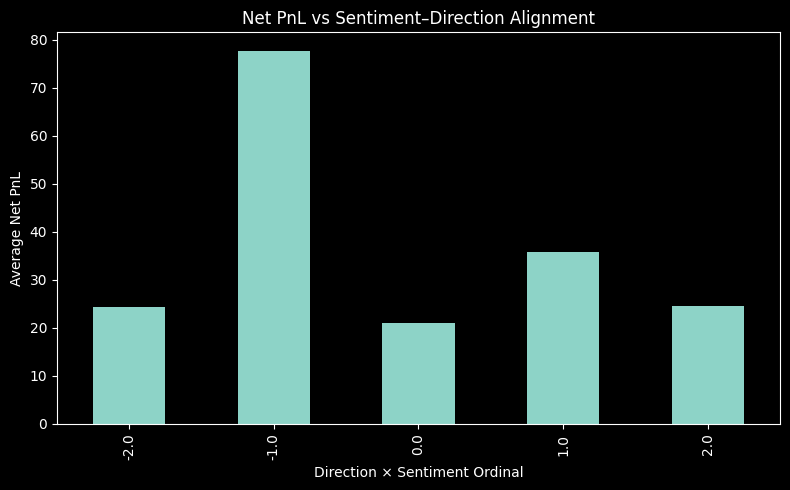

In [171]:
#Does aligning with sentiment improve performance?
interaction_perf = (
    df.groupby("sentiment_direction_interaction")["net_pnl"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(8,5))
interaction_perf.plot(kind="bar")
plt.title("Net PnL vs Sentiment–Direction Alignment")
plt.xlabel("Direction × Sentiment Ordinal")
plt.ylabel("Average Net PnL")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "interaction_pnl.png")
plt.show()